# Maxime ABITBOL 21305862

In [1]:
import numpy
import pandas
import matplotlib.pyplot as plt
import seaborn
seaborn.set_style("white")

%matplotlib inline

## A faire

Nous allons utiliser les données [`pendigits`](https://archive.ics.uci.edu/ml/datasets/Pen-Based+Recognition+of+Handwritten+Digits) de l'*UCI Machine Learning Repository*. Ces données représentent le tracé des chiffres de 0 à 9 par plusieurs personnes. Pour chaque tracé, nous n'avons au final que les coordonnées $(X,Y)$ de 8 points et le chiffre tracé.

Voici ci dessous comment importer les données directement.

In [2]:
pen_tes = pandas.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/pendigits/pendigits.tes", 
                          header=None)
pen_tra = pandas.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/pendigits/pendigits.tra", 
                          header=None)
pen = pen_tes.copy().append(pen_tra, ignore_index = True)
print(pen.shape)
pen.head()

(10992, 17)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,88,92,2,99,16,66,94,37,70,0,0,24,42,65,100,100,8
1,80,100,18,98,60,66,100,29,42,0,0,23,42,61,56,98,8
2,0,94,9,57,20,19,7,0,20,36,70,68,100,100,18,92,8
3,95,82,71,100,27,77,77,73,100,80,93,42,56,13,0,0,9
4,68,100,6,88,47,75,87,82,85,56,100,29,75,6,0,0,9


Comme vous le pouvez le remarquer, les noms des variables ne sont pas renseignés. Celles-ci sont $(x_j, y_j)_{j = 1,\ldots,8}$ et le chiffre. On va donc déjà créer le vecteur correspondant.

In [3]:
a = [c + n for c, n in zip(["x", "y"] * 8, [str(x) for x in range(1, 9) for i in range(2)])]
a.append("chiffre")
print(a)

['x1', 'y1', 'x2', 'y2', 'x3', 'y3', 'x4', 'y4', 'x5', 'y5', 'x6', 'y6', 'x7', 'y7', 'x8', 'y8', 'chiffre']


On va ensuite renommer les colonnes avec ce vecteur.

In [4]:
pen.columns = a
pen.head()

,x1,y1,x2,y2,x3,y3,x4,y4,x5,y5,x6,y6,x7,y7,x8,y8,chiffre
0,88,92,2,99,16,66,94,37,70,0,0,24,42,65,100,100,8
1,80,100,18,98,60,66,100,29,42,0,0,23,42,61,56,98,8
2,0,94,9,57,20,19,7,0,20,36,70,68,100,100,18,92,8
3,95,82,71,100,27,77,77,73,100,80,93,42,56,13,0,0,9
4,68,100,6,88,47,75,87,82,85,56,100,29,75,6,0,0,9


Et pour la suite, nous allons créer une variable contenant les chiffres mais en tant que chaîne de caractère.

In [5]:
pen = pen.assign(chiffre_str = [str(c) for c in pen.chiffre])

Par la suite, nous aurons besoin d'accéder aux $x_j$ uniquement, ou aux $y_j$, voire aux deux. Nous créons donc des vecteurs avec les noms de variables. 

In [6]:
xN = ["x" + str(i + 1) for i in range(8)]
print(xN)
yN = ["y" + str(i + 1) for i in range(8)]
print(yN)
xyN = [a + b for a,b in zip(["x", "y"] * 8, [str(i + 1) for i in range(8) for j in range(2)])]
print(xyN)

['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8']
['y1', 'y2', 'y3', 'y4', 'y5', 'y6', 'y7', 'y8']
['x1', 'y1', 'x2', 'y2', 'x3', 'y3', 'x4', 'y4', 'x5', 'y5', 'x6', 'y6', 'x7', 'y7', 'x8', 'y8']


Ces données ont l'avantage d'être graphique. Nous allons donc représenter le premier tracé, qui est un $8$.

Text(0.5, 1.0, 'Chiffre : 8')

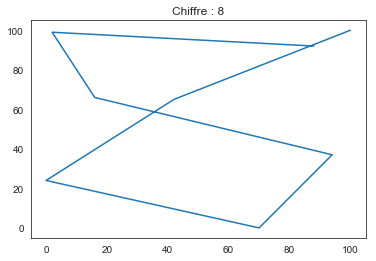

In [7]:
x = pen.loc[0, xN]
y = pen.loc[0, yN]
chiffre = pen.loc[0, "chiffre"]
plt.plot(x, y)
plt.title("Chiffre : " + str(chiffre))

Nous allons régulièrement utiliser ce code, donc nous allons le stocker dans une fonction nommée `dessin()`. Dans celle-ci, nous allons mettre en paramètre les $x_j$ et les $y_j$, le chiffre, ainsi qu'un graphique dans lequel nous allons mettre le dessin. Ceci nous sera utile pour faire plusieurs représentations de chiffres.

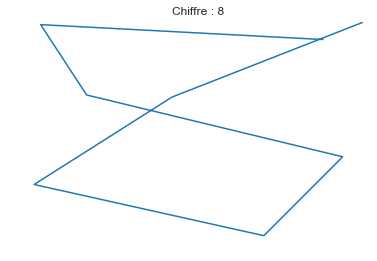

In [8]:
def dessin(p, x, y, chiffre):
    p.plot(x, y)
    p.set_title("Chiffre : " + str(chiffre))
    p.axis("off")
    p.set_xlim([-1, 101])
    p.set_ylim([-1, 101])

fig, ax = plt.subplots()
dessin(ax, x, y, chiffre)

Ensuite, nous créons une liste de `DataFrame`, un pour chaque chiffre. La fonction `query()` permet donc de sélectionner des lignes d'un `DataFrame` en fonction d'une condition (ici, `chiffre` égal 0, 1, ..., 9). Pour éviter les problèmes d'index plus tard, nous devons les réinitialiser pour chaque `DataFrame`, avec la fonction `reset_index()`, en mettant `drop` à vrai. Ceci permet d'oublier les numéros de ligne du `DataFrame` global et que ceux-ci recommencent de 0 pour chaque sous-ensemble.

In [9]:
sub = [pen.query("chiffre == " + str(i)).reset_index(drop = True) for i in range(10)]

Nous voulons maintenant représenter chaque premier exemple de chaque chiffre. Pour cela, nous recherchons la première ligne (`index = 0`) pour chaque sous-ensemble précédemment créé. Et pour simplifier le travail ensuite, nous renvoyons pour chaque chiffre, trois éléments : les $x_j$, les $y_j$ et le chiffre.

In [10]:
subxyc = [[s.loc[0, xN], s.loc[0, yN], s.loc[0, "chiffre"]] for s in sub]

Puis, nous créons une figure (en spécifiant la taille). Et pour chaque chiffre, nous ajoutons un graphique à la figure avec la fonction `add_subplot()`. Celle-ci prend trois paramètres : le nombre de lignes, le nombre de colonnes et le numéro de placement du prochain graphique. Grâce à l'utilisation de la fonction  `dessin()` et de l'objet `subxyc`, la réalisation est simple.

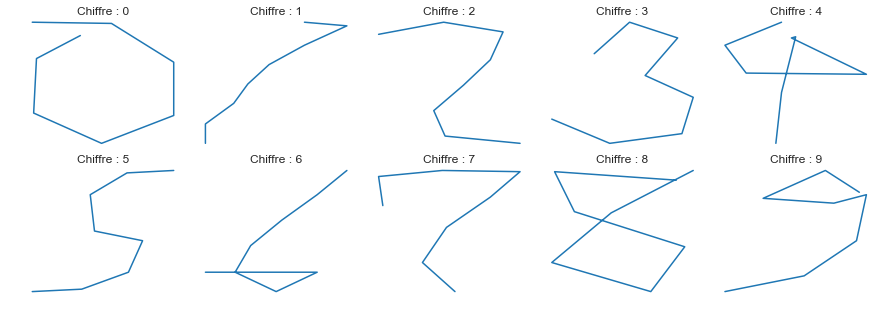

In [11]:
fig = plt.figure(figsize = (15, 5))
for i in range(10):
    ax = fig.add_subplot(2, 5, i + 1)
    dessin(ax, subxyc[i][0], subxyc[i][1], subxyc[i][2])

Le but de ce TP va être de réfléchir à comment répondre à la question suivante :

> Existe-t'il plusieurs façons d'écrire chaque chiffre ?

Pour cela, nous allons dérouler les étapes suivantes :

1. Calculer la moyenne de chaque coordonnée $x_j$ et $y_j$, pour chaque chiffre
1. Représenter le tracé des *chiffres moyens* (i.e. en prenant les coordonnées moyennes donc)
    - Améliorer éventuellement la fonction `dessin()` pour ajouter, si demandé, les numéros des points
1. Réaliser une ACP sur les données (en comparant avec ou sans standardisation)
1. Représenter les chiffres sur le plan factoriel
    - sur un seul graphique
    - avec un graphique par chiffre, sur la même figure
1. Réaliser une classification via DBSCAN pour chaque chiffre
    - choisir un $\varepsilon$ et un nombre minimal de points
    - créer une fonction prenant en paramètre les valeurs ci-dessus à tester et qui réalise les opérations suivantes :
        - calcul de la partition
        - affichage de la répartition des classes
        - représentation des classes sur le plan factoriel (un graphique par classe éventuellement)
        - représentation des tracés moyens pour chaque classe afin de mieux comprendre les différences entre les classes


### 1. Moyenne de chaque coordonnées

In [12]:
# Let's calculate the mean for number ZERO

sub_0 = sub[0]
nb_elm = sub_0.shape[0] # number of elm
sub_0_moy = sub_0.sum() / nb_elm
print(sub_0_moy)

x1             35.372703
y1             86.063867
x2             11.577428
y2             58.310586
x3             14.935258
y3             19.600175
x4             51.172353
y4              7.293963
x5             85.941382
y5             31.301837
x6             89.294838
y6             68.492563
x7             59.011374
y7             89.312336
x8             22.096238
y8             75.237970
chiffre         0.000000
chiffre_str     0.000000
dtype: float64


In [13]:
# Let's calculate the mean for all numbers

sub_moy = [sub_number.sum() / sub_number.shape[0] for sub_number in sub]
sub_moy

[x1             35.372703
 y1             86.063867
 x2             11.577428
 y2             58.310586
 x3             14.935258
 y3             19.600175
 x4             51.172353
 y4              7.293963
 x5             85.941382
 y5             31.301837
 x6             89.294838
 y6             68.492563
 x7             59.011374
 y7             89.312336
 x8             22.096238
 y8             75.237970
 chiffre         0.000000
 chiffre_str     0.000000
 dtype: float64, x1             14.702537
 y1             61.392826
 x2             44.351706
 y2             77.935258
 x3             69.857393
 y3             89.509186
 x4             77.496938
 y4             79.800525
 x5             67.637795
 y5             54.059493
 x6             47.801400
 y6             32.657918
 x7             44.601050
 y7             16.157480
 x8             59.905512
 y8              1.382327
 chiffre         1.000000
 chiffre_str          inf
 dtype: float64, x1             18.392483
 y1   

### 2. Représentation des chiffres moyens

In [14]:
subxyc = [[s.loc[xN], s.loc[yN], str(int(s.loc["chiffre"]))] for s in sub_moy]
subxyc

[[x1    35.372703
  x2    11.577428
  x3    14.935258
  x4    51.172353
  x5    85.941382
  x6    89.294838
  x7    59.011374
  x8    22.096238
  dtype: float64, y1    86.063867
  y2    58.310586
  y3    19.600175
  y4     7.293963
  y5    31.301837
  y6    68.492563
  y7    89.312336
  y8    75.237970
  dtype: float64, '0'], [x1    14.702537
  x2    44.351706
  x3    69.857393
  x4    77.496938
  x5    67.637795
  x6    47.801400
  x7    44.601050
  x8    59.905512
  dtype: float64, y1    61.392826
  y2    77.935258
  y3    89.509186
  y4    79.800525
  y5    54.059493
  y6    32.657918
  y7    16.157480
  y8     1.382327
  dtype: float64, '1'], [x1    18.392483
  x2    42.130245
  x3    67.460664
  x4    51.276224
  x5    19.831294
  x6    11.639860
  x7    53.057692
  x8    98.710664
  dtype: float64, y1    76.949301
  y2    99.387238
  y3    79.761364
  y4    46.046329
  y5    19.378497
  y6     9.093531
  y7     5.246503
  y8     4.171329
  dtype: float64, '2'], [x1    24.784834
 

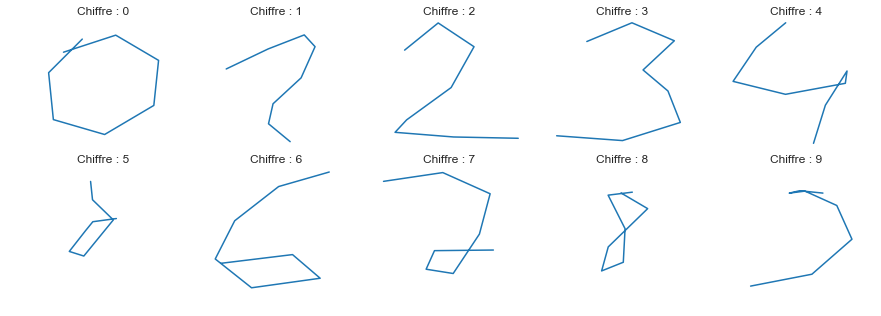

In [15]:
fig = plt.figure(figsize = (15, 5))
for i in range(10):
    ax = fig.add_subplot(2, 5, i + 1)
    dessin(ax, subxyc[i][0], subxyc[i][1], subxyc[i][2])

### 3. Réduction avec ACP

In [15]:
from sklearn.decomposition import PCA

pca = PCA()
pen_coord = pen[xyN]
pca.fit(pen_coord)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [16]:
eig = pandas.DataFrame(
    {
        "Dimension" : ["Dim" + str(x + 1) for x in range(16)], 
        "Valeur propre" : numpy.round(pca.explained_variance_),
        "% variance expliquée" : numpy.round(pca.explained_variance_ratio_ * 100),
        "% cum. var. expliquée" : numpy.round(numpy.cumsum(pca.explained_variance_ratio_) * 100)
    },
    columns = ["Dimension", "Valeur propre", "% variance expliquée", "% cum. var. expliquée"]
)
eig

,Dimension,Valeur propre,% variance expliquée,% cum. var. expliquée
0,Dim1,4214.0,28.0,28.0
1,Dim2,3702.0,25.0,53.0
2,Dim3,2286.0,15.0,69.0
3,Dim4,1341.0,9.0,78.0
4,Dim5,862.0,6.0,83.0
5,Dim6,718.0,5.0,88.0
6,Dim7,457.0,3.0,91.0
7,Dim8,398.0,3.0,94.0
8,Dim9,287.0,2.0,96.0
9,Dim10,204.0,1.0,97.0


**La même chose mais en standardisant les données d'abords (bien que ce ne soit pas necessaire car les données sont de la même unité).**

In [17]:
from sklearn.preprocessing import scale

pca = PCA()
pen_coord2 = pen[xyN]
pca.fit(scale(pen_coord2))

eig2 = pandas.DataFrame(
    {
        "Dimension" : ["Dim" + str(x + 1) for x in range(16)], 
        "Valeur propre" : numpy.round(pca.explained_variance_),
        "% variance expliquée" : numpy.round(pca.explained_variance_ratio_ * 100),
        "% cum. var. expliquée" : numpy.round(numpy.cumsum(pca.explained_variance_ratio_) * 100)
    },
    columns = ["Dimension", "Valeur propre", "% variance expliquée", "% cum. var. expliquée"]
)
eig2

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  """


,Dimension,Valeur propre,% variance expliquée,% cum. var. expliquée
0,Dim1,5.0,29.0,29.0
1,Dim2,3.0,20.0,50.0
2,Dim3,3.0,16.0,66.0
3,Dim4,1.0,8.0,73.0
4,Dim5,1.0,7.0,80.0
5,Dim6,1.0,5.0,85.0
6,Dim7,1.0,4.0,89.0
7,Dim8,1.0,3.0,92.0
8,Dim9,0.0,3.0,95.0
9,Dim10,0.0,2.0,97.0


### 4. Représenter les chiffres sur le plan factoriel

In [18]:
from sklearn.decomposition import PCA

pca = PCA()
pen_coord = pen[xyN]
pca.fit(pen_coord)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [19]:
eig = pandas.DataFrame(
    {
        "Dimension" : ["Dim" + str(x + 1) for x in range(16)], 
        "Valeur propre" : numpy.round(pca.explained_variance_),
        "% variance expliquée" : numpy.round(pca.explained_variance_ratio_ * 100),
        "% cum. var. expliquée" : numpy.round(numpy.cumsum(pca.explained_variance_ratio_) * 100)
    },
    columns = ["Dimension", "Valeur propre", "% variance expliquée", "% cum. var. expliquée"]
)

In [20]:
pen_pca = pca.transform(pen[xyN])

pen_pca_df =  pandas.DataFrame({
    "Dim1" : pen_pca[:,0], 
    "Dim2" : pen_pca[:,1], 
    "chiffre" : pen.chiffre_str
})

    - sur un seul graphique

Text(0.5, 0.98, 'Premier plan factoriel')

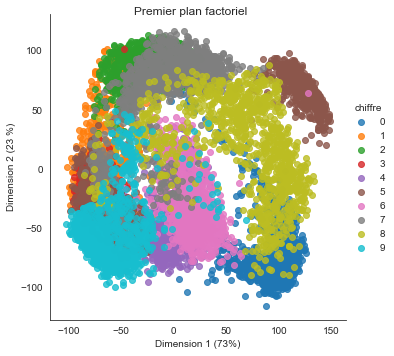

In [21]:
g_pca = seaborn.lmplot("Dim1", "Dim2", hue = "chiffre", data = pen_pca_df, fit_reg = False)
g_pca.set(xlabel = "Dimension 1 (73%)", ylabel = "Dimension 2 (23 %)")
g_pca.fig.suptitle("Premier plan factoriel")

    - avec un graphique par chiffre, sur la même figure

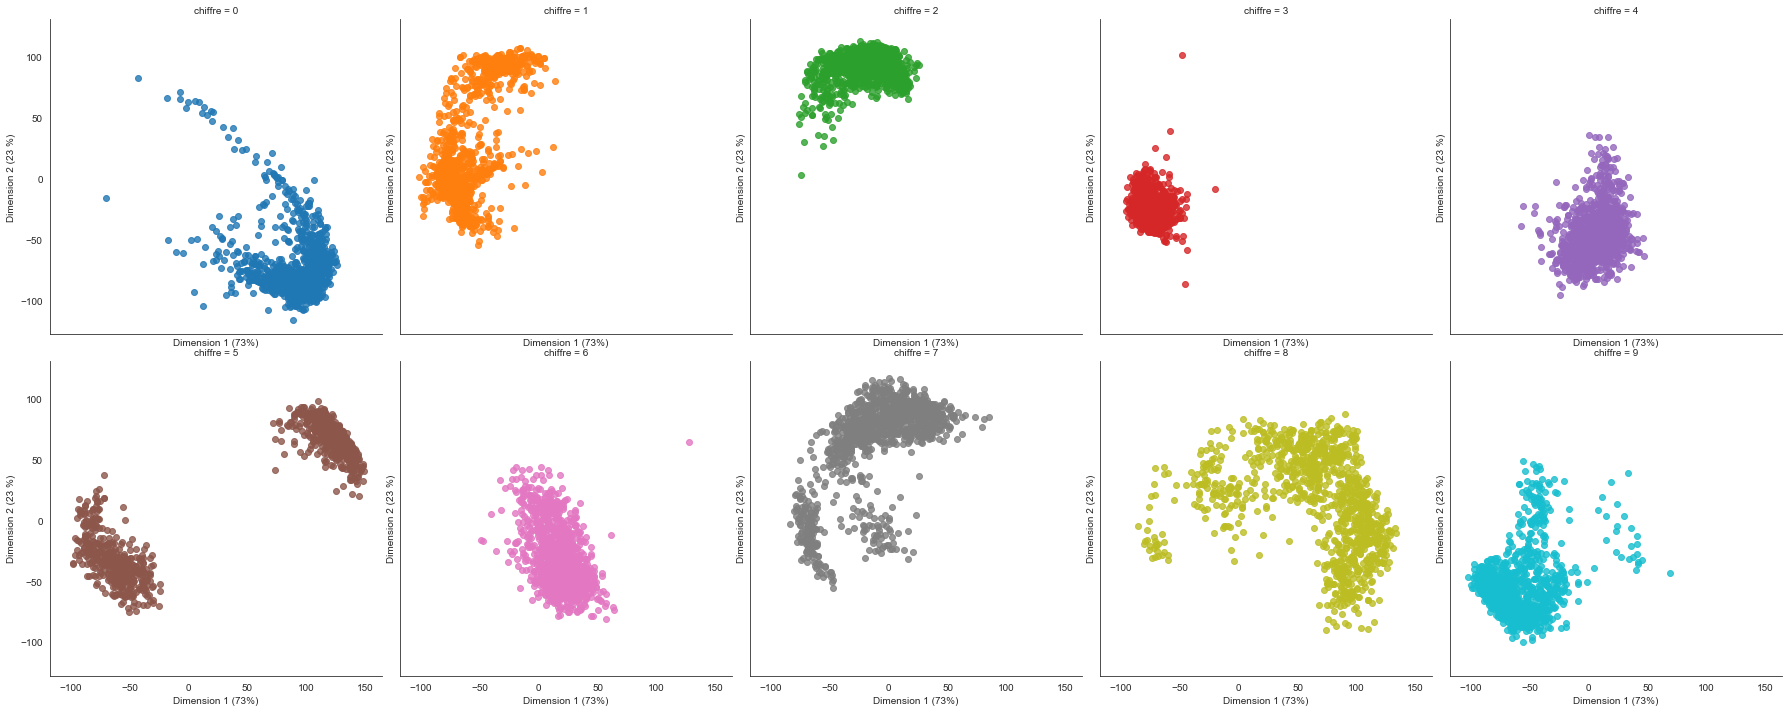

In [22]:
g_pca2 = seaborn.lmplot("Dim1", "Dim2", hue = "chiffre", col = "chiffre", col_wrap = 5, data = pen_pca_df, fit_reg = False)
g_pca2.set(xlabel = "Dimension 1 (73%)", ylabel = "Dimension 2 (23 %)")

### 4. Réaliser une classification via DBSCAN pour chaque chiffre

Ma fonction 

In [23]:
from sklearn.cluster import DBSCAN

def my_dbscan(eps, min_samples, chiffre):
    db = DBSCAN(eps = eps, min_samples = min_samples)
    db.fit(sub[chiffre])

    unique, counts = numpy.unique(db.labels_, return_counts=True)
    df_stats = pandas.DataFrame({
        "Classe" : unique, 
        "Occurence" : counts
    })

    print(df_stats)

    fig = plt.figure(figsize = (15, 5))
    for i in range(len(unique)):
        ax = fig.add_subplot(2, 5, i + 1)

        index_classe = numpy.where(db.labels_ == unique[i])

        df_moy = sub[chiffre].iloc[index_classe]
        df_moy = df_moy.mean()
        subxyc = [df_moy.loc[xN], df_moy.loc[yN], str(int(df_moy.loc["chiffre"]))]

        dessin(ax, subxyc[0], subxyc[1], unique[i])

### Test pour chacun des chiffres

   Classe  Occurence
0      -1        121
1       0       1022


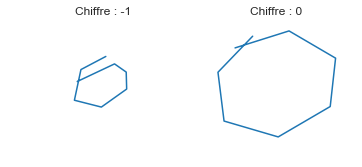

In [24]:
my_dbscan(30, 10, 0)  

   Classe  Occurence
0      -1        209
1       0        605
2       1        248
3       2         81


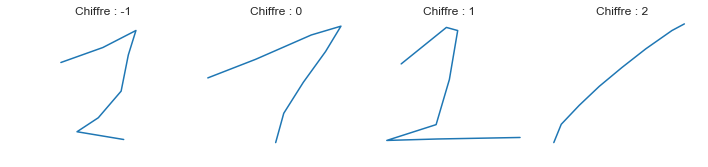

In [25]:
my_dbscan(30, 10, 1)  

   Classe  Occurence
0      -1         49
1       0       1095


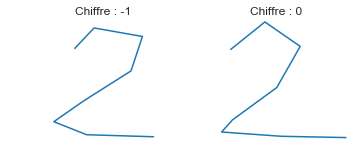

In [26]:
my_dbscan(30, 10, 2)  

   Classe  Occurence
0      -1         46
1       0       1009


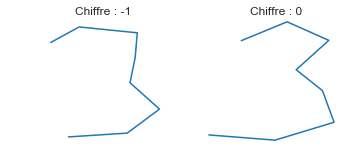

In [27]:
my_dbscan(30, 10, 3)  

   Classe  Occurence
0      -1        242
1       0        894
2       1          8


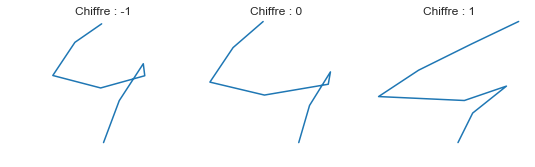

In [28]:
my_dbscan(30, 10, 4)  

   Classe  Occurence
0      -1         32
1       0        417
2       1        606


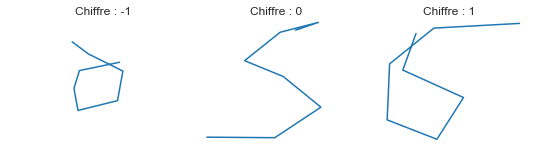

In [29]:
my_dbscan(40, 20, 5)  

   Classe  Occurence
0      -1         20
1       0       1036


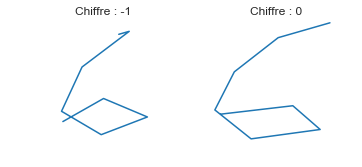

In [30]:
my_dbscan(40, 15, 6)  

   Classe  Occurence
0      -1          5
1       0        144
2       1        912
3       2         81


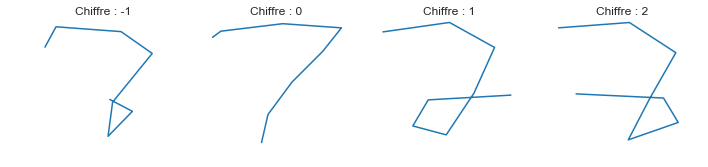

In [31]:
my_dbscan(50, 5, 7)  

   Classe  Occurence
0      -1        880
1       0        136
2       1         10
3       2         10
4       3          8
5       4         11


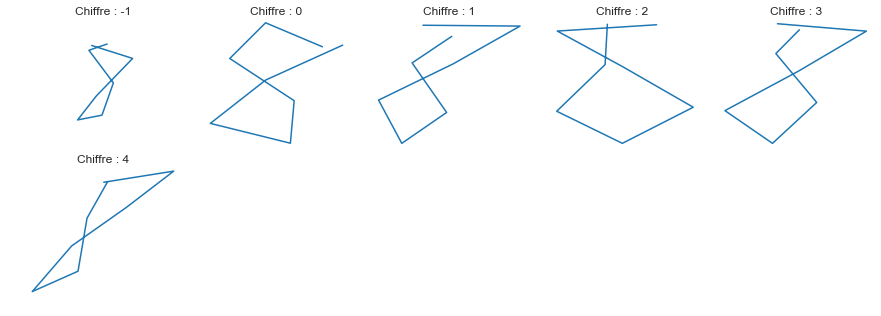

In [32]:
my_dbscan(30, 10, 8)  

   Classe  Occurence
0      -1        224
1       0        638
2       1         26
3       2         39
4       3         19
5       4         43
6       5         31
7       6         15
8       7         20


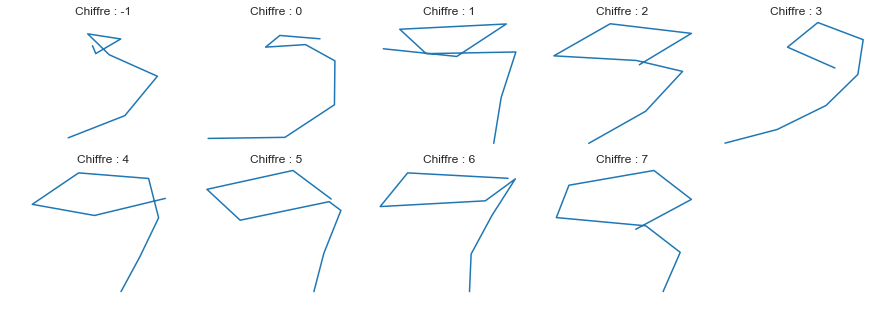

In [39]:
my_dbscan(40, 15, 9)  